## 4. Clutter, CFAR, AoA


### a) Clutter

Radar not only receive the reflected signals from the objects of interest, but also from the environment and unwanted objects. The **backscatter from these unwanted sources** is called as ***clutter***.

These unwanted signals are generally produced by the reflections from the ground, sea, buildings, trees, rain, fog etc. The magnitude of the clutter signal depends upon:

* The nature of the surface - ground, water, snow (e.g deserts have low reflectivity, whereas the frozen snow has high reflectivity)
* Smoothness of the surface
* Grazing angle - Angle the radar beam makes with the surface
* Radar Frequency

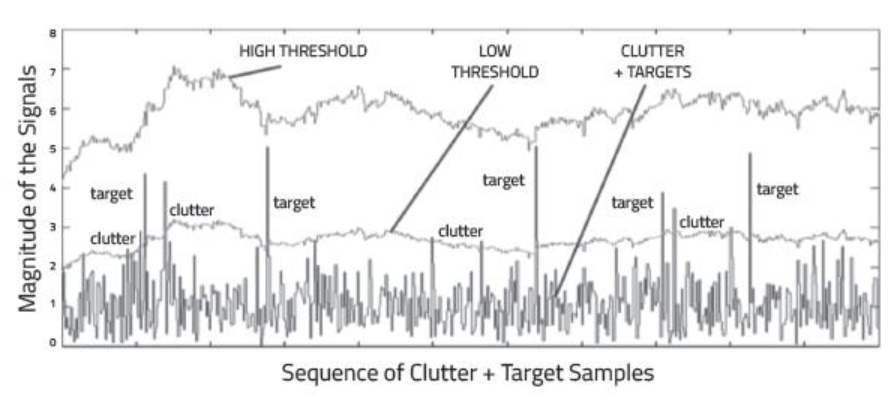
Return Signal from multiple targets along with some from the clutter.
source : http://www.redalyc.org/jatsRepo/911/91149521004/index.html

#### Clutter Thresholding
It is important to filter out clutter for successful detection of targets. This is critical in a driving scenario to avoid the car from suddenly braking in the absence of valid targets. This sudden braking happens when the radar detects reflections that are generated from the clutter.

One technique to remove clutter is to **remove the signals having 0 doppler velocity**. Since, the clutter in the driving scenario are **often created by the stationary targets**, the 0 doppler filtering can help get rid of them.

The downside of 0 doppler filtering is that the radar would not be able to detect the stationary targets in its path. This would lead to **detection failures**.

Another technique is to use ***fixed clutter thresholding***. With fixed thresholding, signal below the threshold value is rejected. With this method, if the detection threshold is set too high, there will be very few false alarms, but it will also mask the valid targets. If the threshold is set too low, then it would lead to too many false alarms. In other words, the **false alarm rate** would be too high.

The **false alarm rate** is the **rate of erroneous radar detections by noise or other interfering signals**. It is a measure of **the presence of detected radar targets when there is no valid target present**.

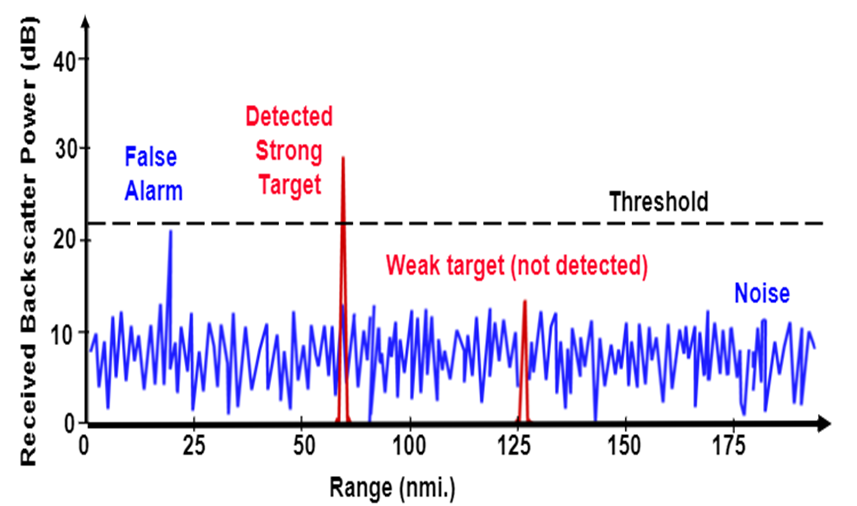
Fixed Threshold leading to False Alarms and missed detections of weak target

#### Dynamic Thresholding
Another approach to clutter thresholding is to use **dynamic thresholding**. Dynamic thresholding involves varying the threshold level to reduce the false alarm rate.

In the rest of this lesson, you will learn about a dynamic thresholding technique called ***CFAR (Constant False Alarm Rate)***. With this technique, **the noise at every or group of range/doppler bins is monitored and the signal is compared to the local noise level**. This comparison is used create a threshold which holds the false alarm rate constant. Let's have a look in the next concept!

#### Further Research
See the resources [here](http://www.radartutorial.eu/11.coherent/co04.en.html) and [here](https://journals.sagepub.com/doi/pdf/10.1177/1550147717729793) for further information about clutter.


### b) CFAR

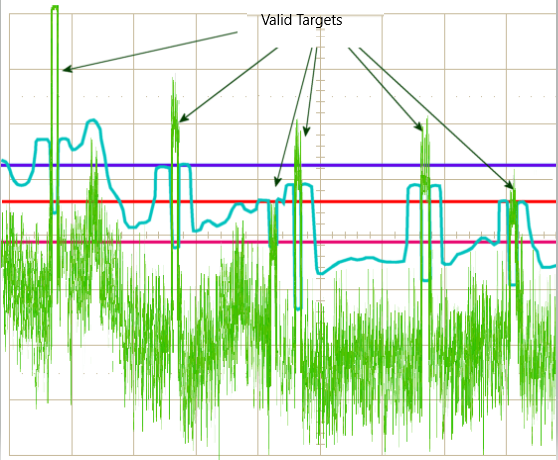
CA-CFAR and OS-CFAR
source :http://www.radartutorial.eu

The false alarm issue can be resolved by implementing the constant false alarm rate. CFAR varies the detection threshold based on the vehicle surroundings. The CFAR technique estimates the level of interference in radar range and doppler cells **“Training Cells”** on either or both the side of the **“Cell Under Test”**. The estimate is then used to decide if the target is in the **Cell Under Test (CUT)**.

The process loops across all the range cells and decides the presence of target based on the noise estimate.The basis of the process is that when noise is present, **the cells around the cell of interest will contain a good estimate of the noise, i.e. it assumes that the noise or interference is spatially or temporarily homogeneous**. Theoretically it will produce a constant false alarm rate, which is independent of the noise or clutter level

There are multiple categories of CFAR:

* Cell Averaging CFAR (CA-CFAR)
* Ordered Statistics CFAR (OS CFAR)
* Maximum Minimum Statistic (MAMIS CFAR)
* And, multiple variants of CA-CFAR.
Here, we will be covering the basic CA-CFAR.


### c) CA-CFAR

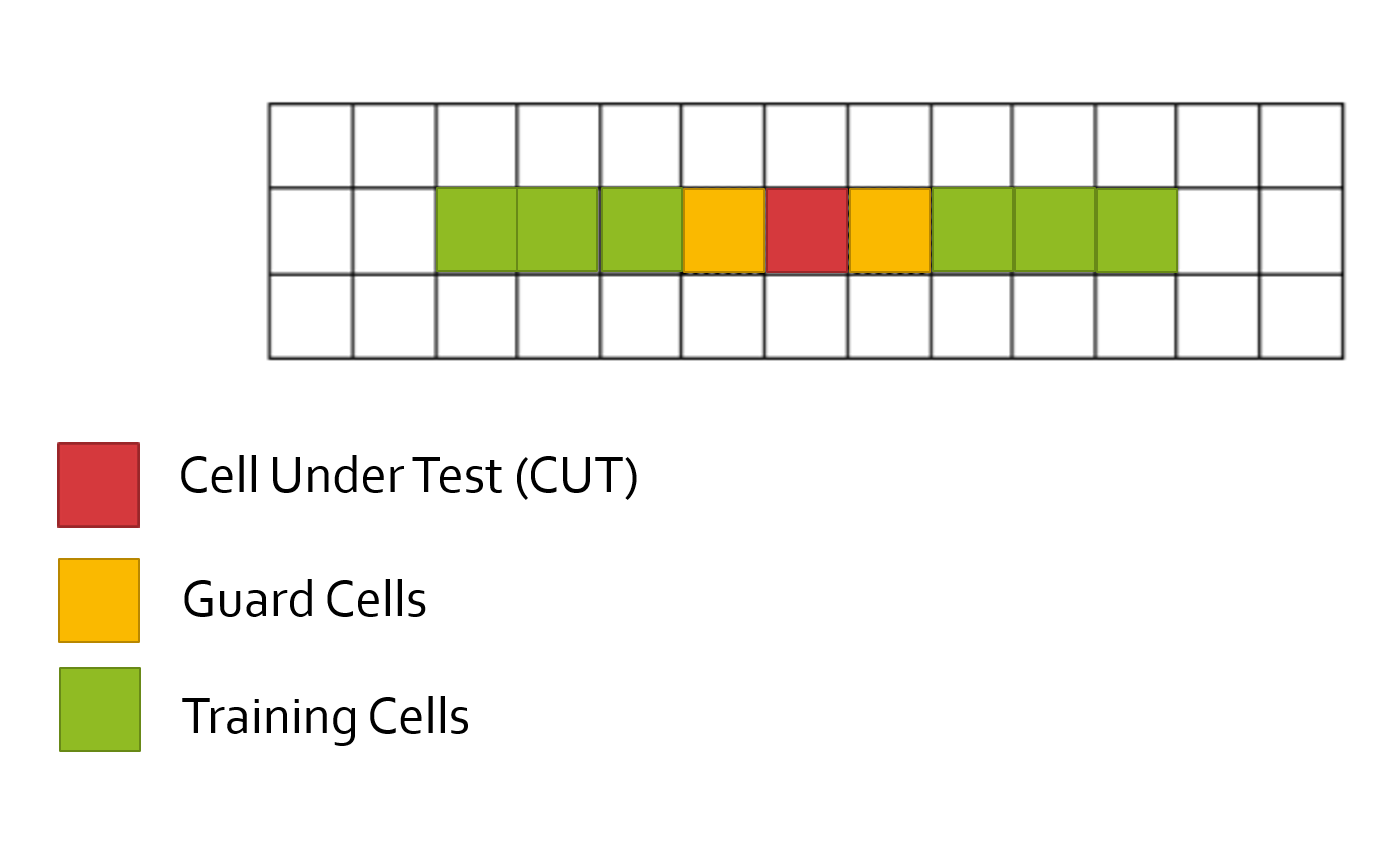
CA-CFAR Training Cells : 3 Guard Cell : 1

CA-CFAR is the most commonly used CFAR detection technique. As seen in the previous lesson, the FFT blocks are generated on implementing range and doppler FFTs across the number of chirps. The CFAR process includes the sliding of a window across the cells in FFT blocks. Each window consists of the following cells.

**Cell Under Test**: The cell that is tested to detect the presence of the target by comparing the signal level against the noise estimate (threshold).

**Training Cells**: The level of noise is measured over the Training Cells. The Training Cells can be divided into two regions, the cells lagging the CUT, called **lagging Training Cells** and the cells leading the CUT, called **Leading Training Cells**. The noise is estimated by averaging the noise under the training cells. In some cases **either** leading or lagging cell average is taken, while in the other the leading and lagging cell average is combined and **the higher of two** is considered for noise level estimate.

**The number of training cells should be decided based on the environment. If a dense traffic scenario then the fewer training cells should be used, as closely spaced targets can impact the noise estimate**.

**Guard Cells**: The cells just next to CUT are assigned as Guard Cells. The purpose of the Guard Cells is to avoid the target signal from leaking into the training cells that could adversely affect the noise estimate. **The number of guard cells should be decided based on the leakage of the target signal out of the cell under test. If target reflections are strong they often get into surrounding bins**.

**Threshold Factor (Offset)**: Use an offset value to scale the noise threshold. If the signal strength is defined in logarithmic form then add this offset value to the average noise estimate, else multiply it.

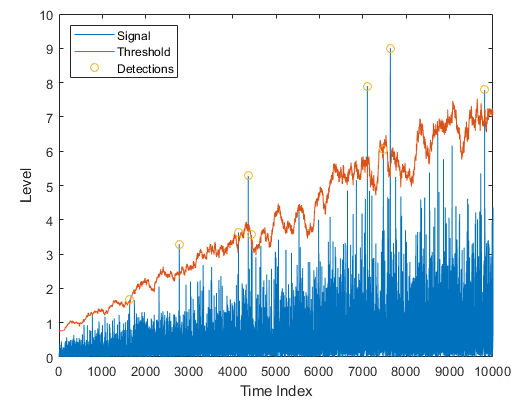

#### 1D CFAR Exercise
The following steps here can be used to implement CFAR in the next MATLAB exercise. You can use the code template below to get started as well.

**T**: Number of Training Cells
**G**: Number of Guard Cells
**N**: Total number of Cells

1. Define the number of training cells and guard cells
2. Start sliding the window one cell at a time across the complete FFT 1D array. Total window size should be: 2(T+G)+CUT
3. For each step, sum the signal (noise) within all the leading or lagging training cells
4. Average the sum to determine the noise threshold
5. Using an appropriate offset value scale the threshold
6. Now, measure the signal in the CUT, which is T+G+1 from the window starting point
7. Compare the signal measured in 5 against the threshold measured in 4
8. If the level of signal measured in CUT is smaller than the threshold measured, then assign 0 value to the signal within CUT.

```c
% Implement 1D CFAR using lagging cells on the given noise and target scenario.

% Close and delete all currently open figures
close all;

% Data_points
Ns = 1000;

% Generate random noise
s=randn(Ns,1);

%Targets location. Assigning bin 100, 200, 300 and 700 as Targets with the amplitudes of 8, 9, 4, 11.
s([100 ,200, 300, 700])=[8 9 4 11];

%plot the output
plot(s);

% TODO: Apply CFAR to detect the targets by filtering the noise.

% 1. Define the following:
% 1a. Training Cells
% 1b. Guard Cells 

% Offset : Adding room above noise threshold for desired SNR 
offset=3;

% Vector to hold threshold values 
threshold_cfar = [];

%Vector to hold final signal after thresholding
signal_cfar = [];

% 2. Slide window across the signal length
for i = 1:(Ns-(G+T))     

    % 2. - 5. Determine the noise threshold by measuring it within the training cells

    % 6. Measuring the signal within the CUT

    % 8. Filter the signal above the threshold

    signal_cfar = [signal_cfar, {signal}];
end




% plot the filtered signal
plot (cell2mat(signal_cfar),'g--');

% plot original sig, threshold and filtered signal within the same figure.
figure,plot(s);
hold on,plot(cell2mat(circshift(threshold_cfar,G)),'r--','LineWidth',2)
hold on, plot (cell2mat(circshift(signal_cfar,(T+G))),'g--','LineWidth',4);
legend('Signal','CFAR Threshold','detection')
    
```

#### Further Research
For further research, see the articles [here](http://www.radartutorial.eu/01.basics/False%20Alarm%20Rate.en.html) and [here](https://arxiv.org/pdf/1709.09786.pdf).


### d) CFAR 2D
The 2D CFAR is similar to 1D CFAR, but is implemented in both dimensions of the range doppler block. The 2D CA-CFAR implementation involves the training cells occupying the cells surrounding the cell under test with a guard grid in between to prevent the impact of a target signal on the noise estimate.

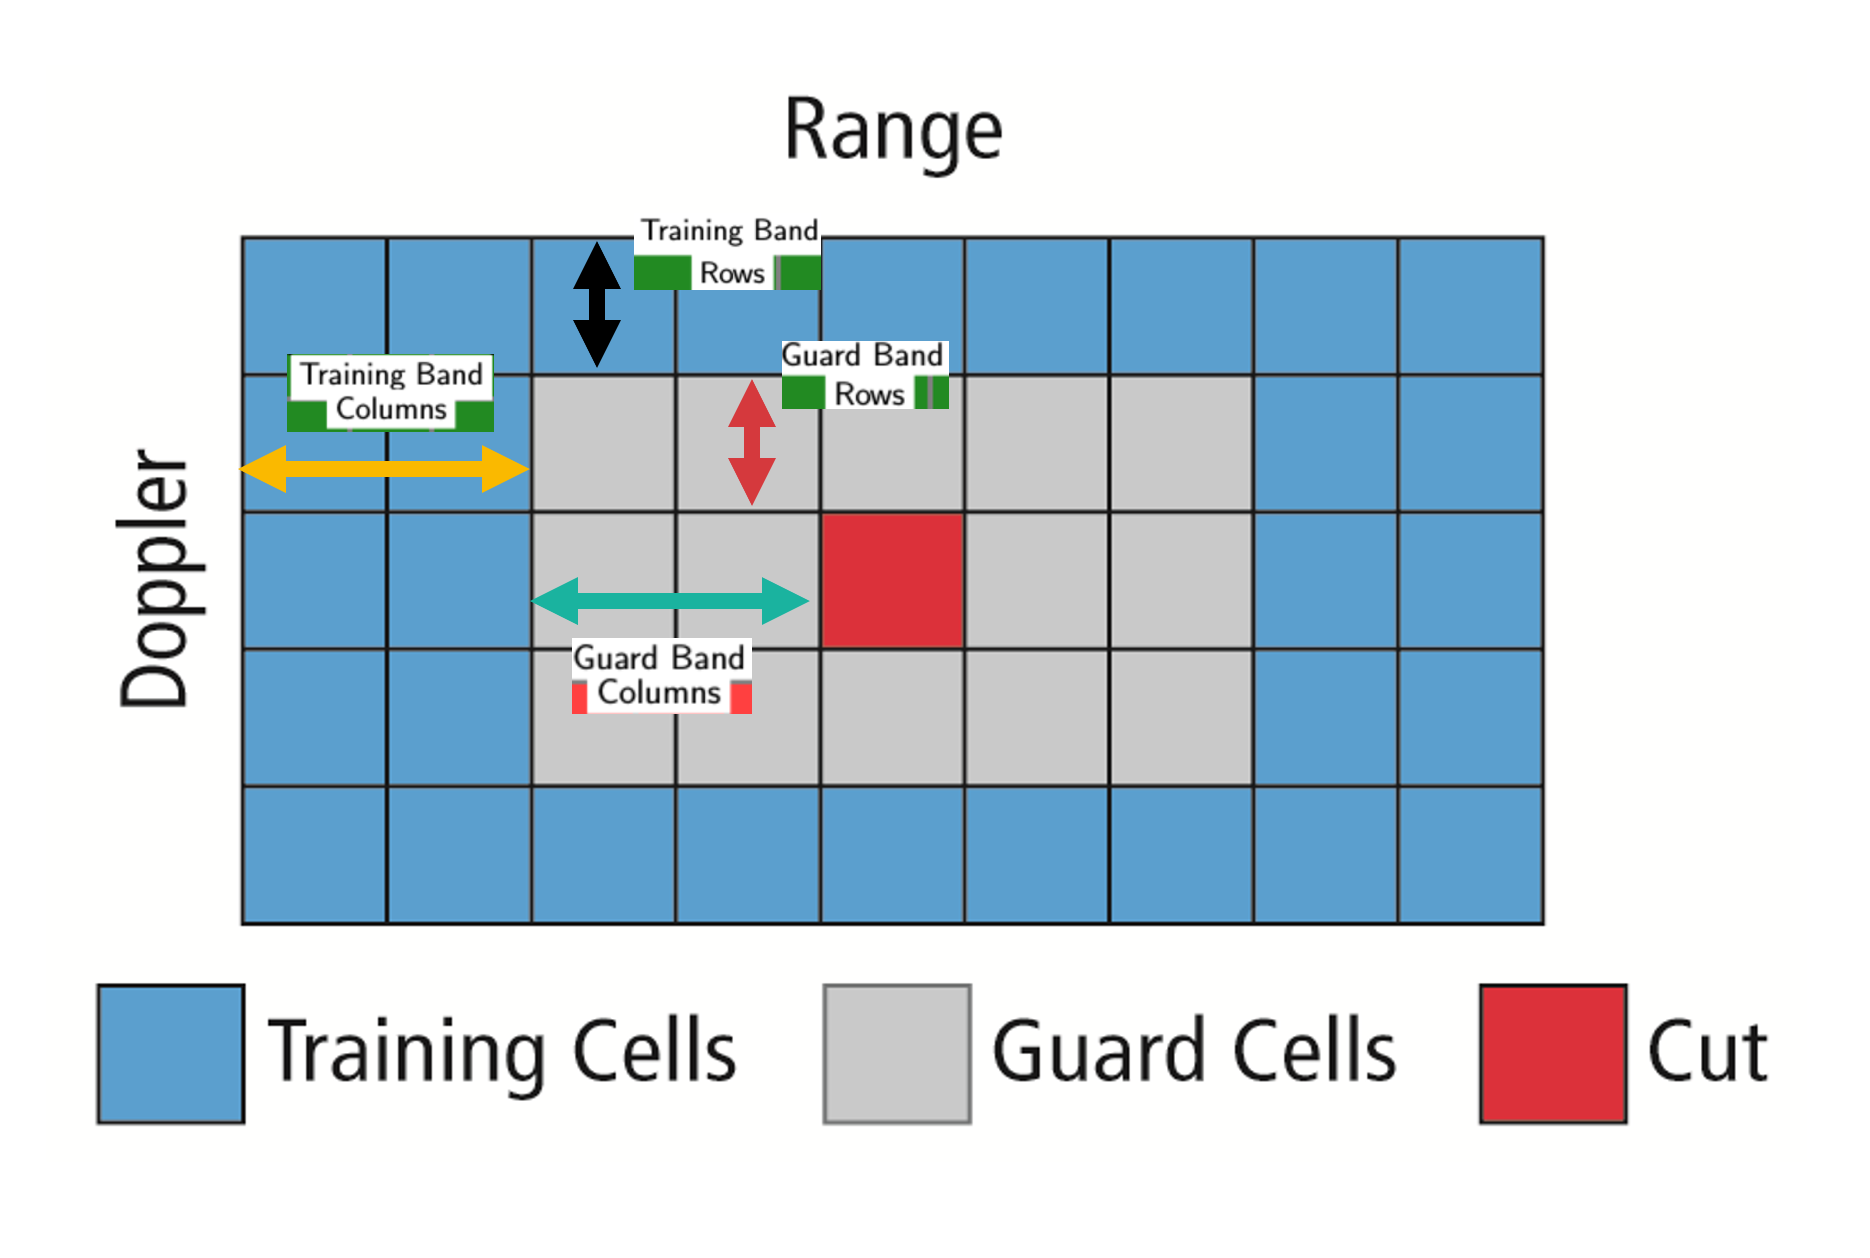
2D CFAR
source : electronicproducts.com

#### 2D CFAR Steps
You won't need to implement a 2D-CFAR yet, but you will implement a 2D CFAR on the range doppler output for your final project! The following steps can be used to implement 2D-CFAR in MATLAB:

Determine the number of Training cells for each dimension Tr and Td. Similarly, pick the number of guard cells Gr and Gd.
Slide the Cell Under Test (CUT) across the complete cell matrix
Select the grid that includes the training, guard and test cells. Grid Size = (2Tr+2Gr+1)(2Td+2Gd+1).
The total number of cells in the guard region and cell under test. (2Gr+1)(2Gd+1).
This gives the Training Cells : (2Tr+2Gr+1)(2Td+2Gd+1) - (2Gr+1)(2Gd+1)
Measure and average the noise across all the training cells. This gives the threshold
Add the offset (if in signal strength in dB) to the threshold to keep the false alarm to the minimum.
Determine the signal level at the Cell Under Test.
If the CUT signal level is greater than the Threshold, assign a value of 1, else equate it to zero.
Since the cell under test are not located at the edges, due to the training cells occupying the edges, we suppress the edges to zero. Any cell value that is neither 1 nor a 0, assign it a zero.

#### Further Research
You can find out more about this [here](http://www.radartutorial.eu/01.basics/False%20Alarm%20Rate.en.html) and [here](https://arxiv.org/pdf/1709.09786.pdf).


### e) Angle of Arrival Introduction

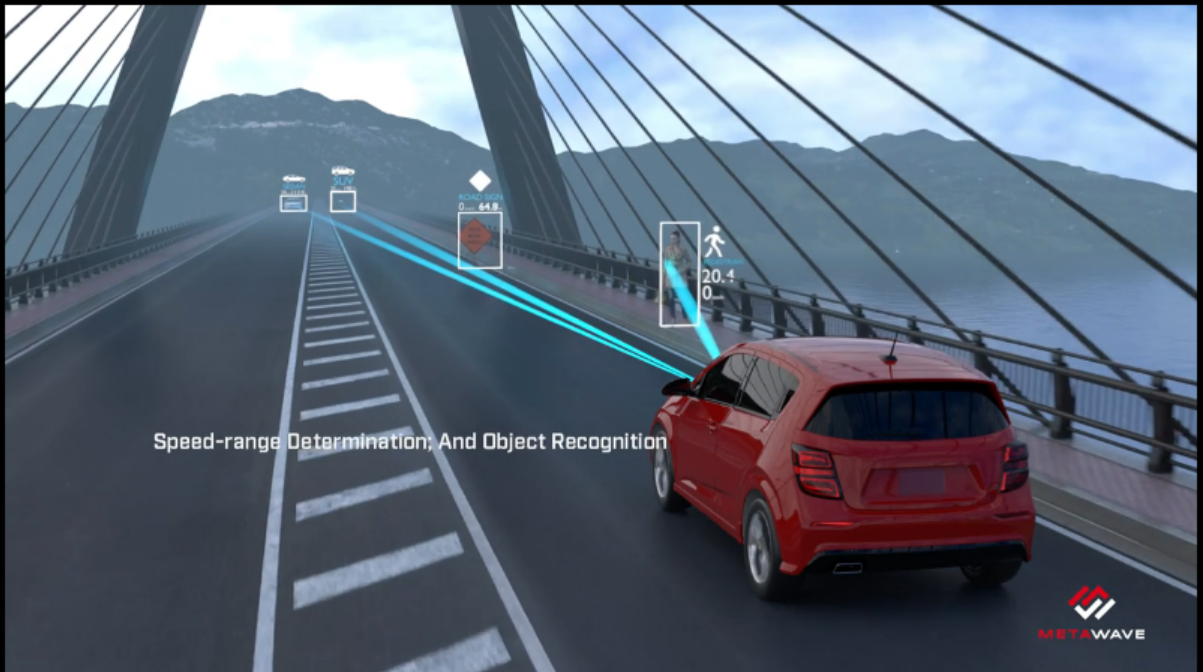

A ***phased array antenna*** is an antenna array that steers the beam electronically in the desired direction. The array steers the beam if each antenna element in an array is excited by the signal with certain phase values. This phenomenon is referred to as beam scanning.

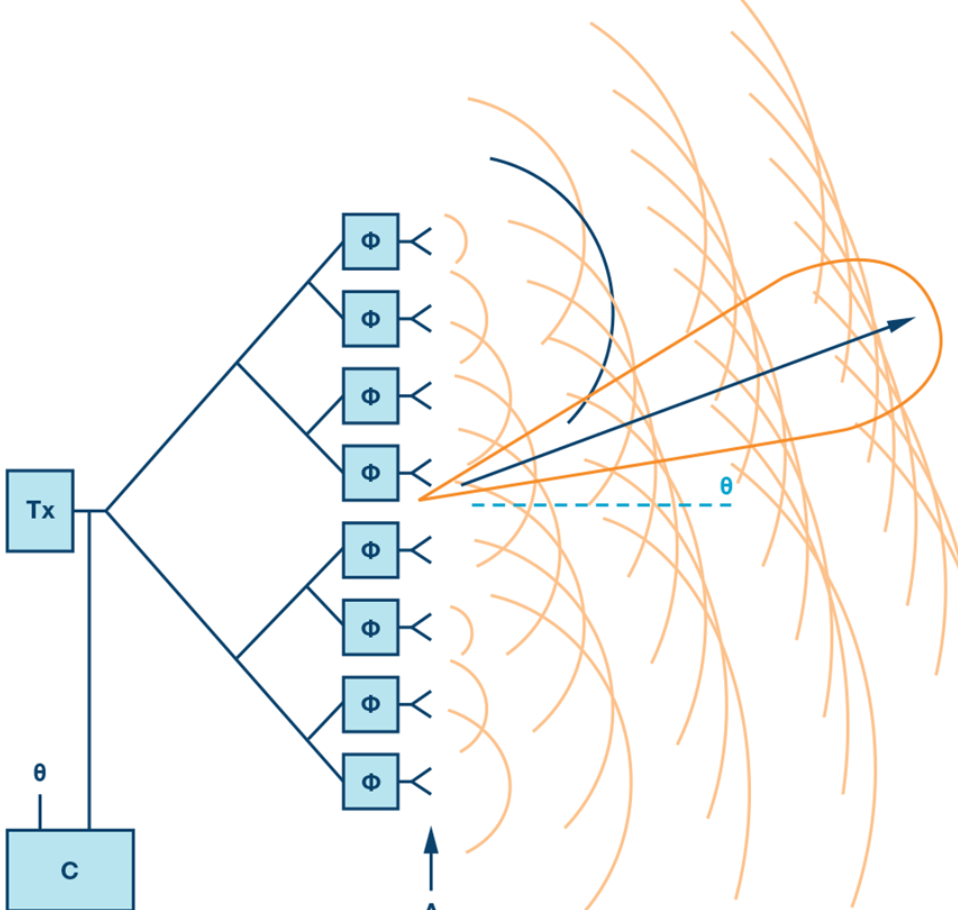
Beam Steering Design. Here the \PhiΦ represents the **phase shifters**. Phase shifters are the electronic components that changes the phase to make the beam steer in a desired direction.
source : analog.com

For antenna beam to steer in a desired direction, the phase shifters are programmed to have constant phase increments. If an antenna comprises of six radiating elements and the **phase delta** required to steer a beam in a given direction is **15 degrees**, then the following would be the phase value on each element [0,15,30,45,60,75] degrees. The increment phase shift along with the spacing between antenna elements (d) determines the steering angle of an antenna using the following equation

**Φ = 360⋅d⋅sin(theta)/λ**

* Φ= incremental phase shift
* d= spacing between antenna elements
* θ= steering direction from the normal of the antenna surface
* λ= wavelength of the signal

As the radar scan the surroundings by steering the beam at the programmed angles, it can sense the angle of the return signal. This helps Radar create a spatial perception of the environment.

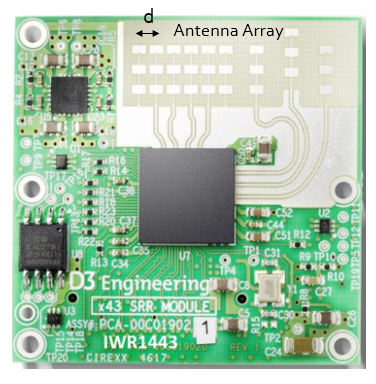
Radar Module for Automotive Applications from D3 Engineering

#### Steering Angle
Determine the steering angle of an antenna beam in degrees for the given phase increment:

Frequency of operation = 77 GHz 
Speed of light = 3*10^8 m/s 
Phase increment = 45 degrees 
Antenna element spacing = wavelength/2

**Answer: 14.4775 degrees**

#### Angle of Arrival

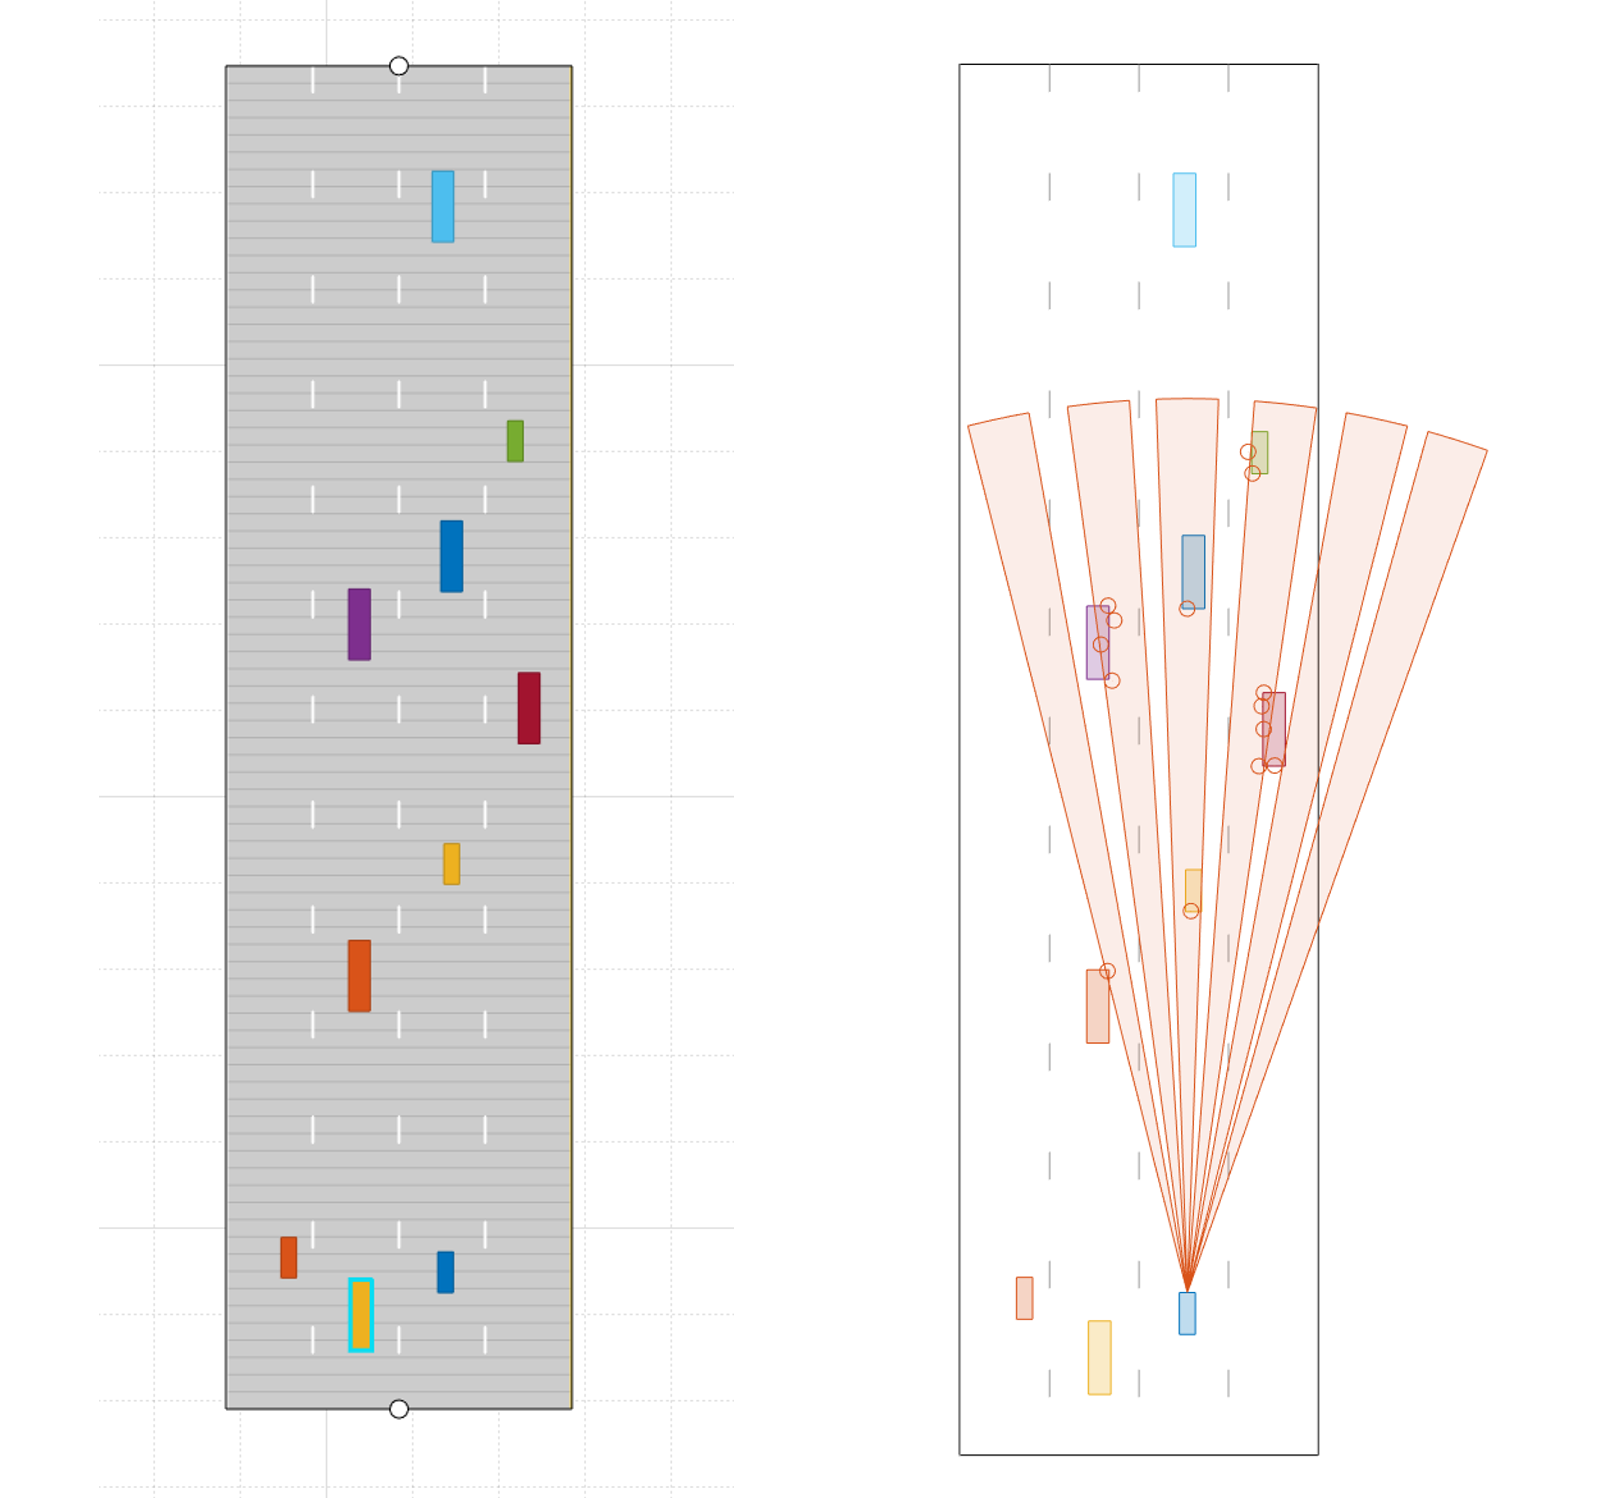
Road scenario for beam steering radar

As the radar scans the surroundings by steering the beam at the programmed angles, it measures the SNR of reflected signals from targets located at different angles spatially. This helps in creating an **angle of arrival vs SNR grid** for radar’s spatial perception.

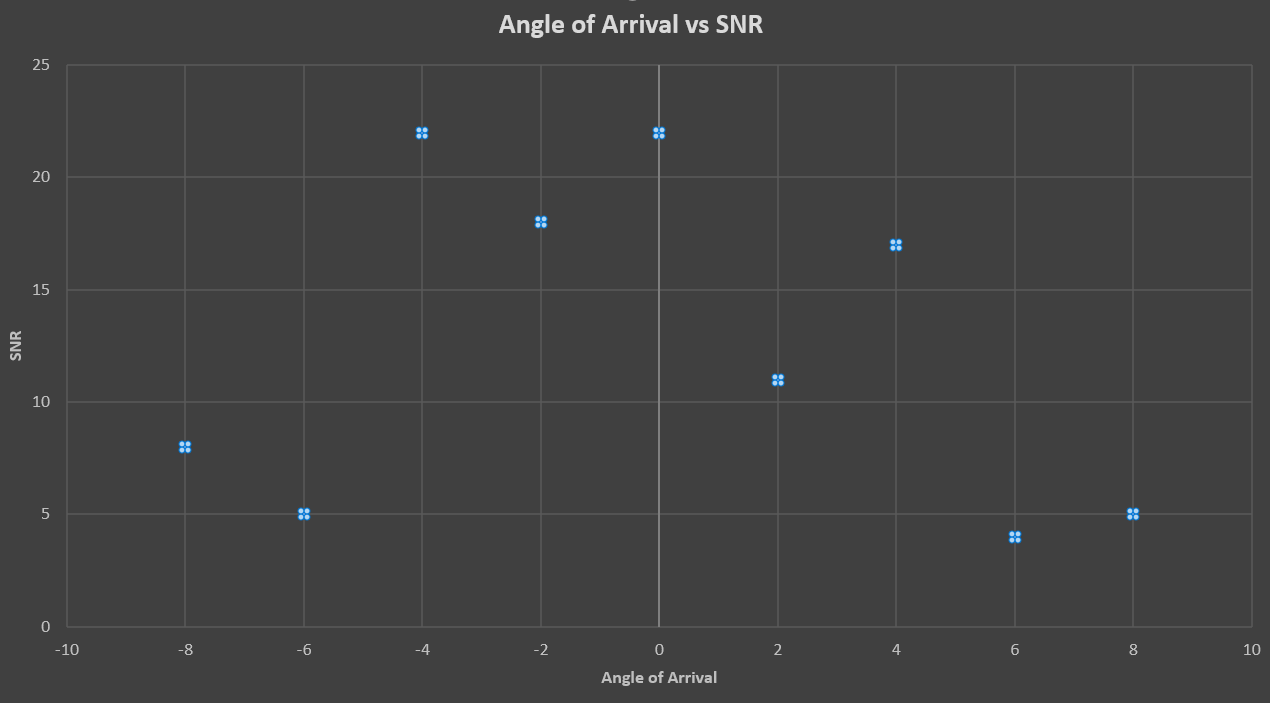

#### Further Research
For more information about phased array antennas see [here](http://www.radartutorial.eu/06.antennas/Phased%20Array%20Antenna.en.html).


## 5. Clustering and Tracking


### a) Clustering

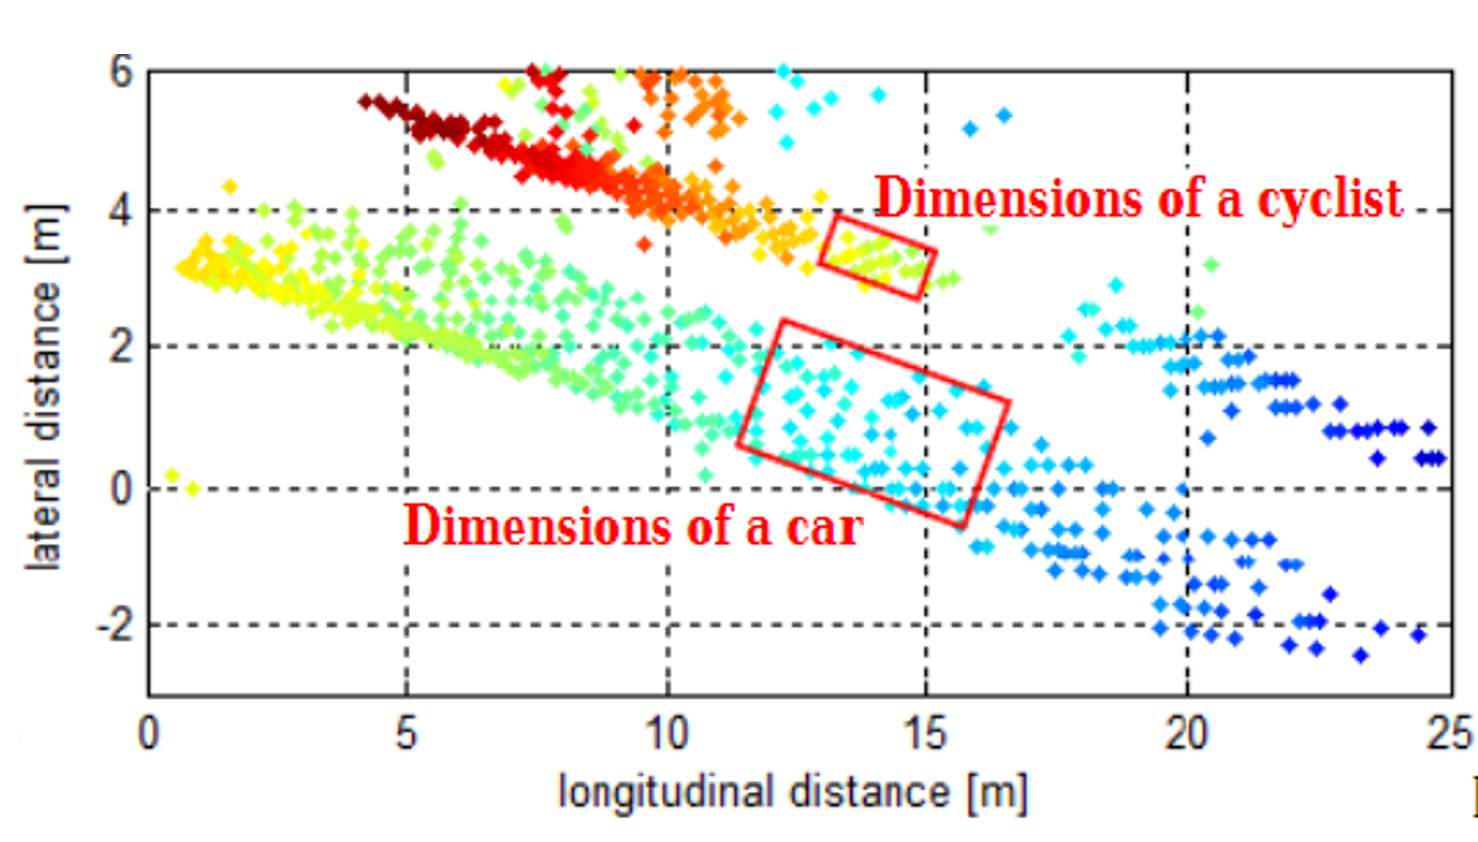
Clustering of a car and bicycle
source : https://ieeexplore.ieee.org/document/7226315

For enhanced perception in autonomous driving, there is a need to track multiple targets separately. The object tracking is computationally expensive and tracking multiple targets simultaneously requires lots of processing power and memory.

Due to the advancements in radar technology and increasing sensing resolutions, a radar can generate detections from plentitude of scattering points on the target. If a tracker is assigned to every detection from the same target, then it can overburden the processing unit. Hence, it is important to cluster the detections from every target and assign a single track for each.

This is where the clustering algorithm becomes important for successful object tracking.

Here we will discuss the basic clustering algorithm based on the euclidean distance. The algorithm here groups the detection points based on their proximity measured by the euclidean distance between those points.

All the detection points that are within the size of the target are considered as one cluster, merged into a centroid position. Each cluster is now assigned a new range and velocity, which is the mean of measured range and velocity of all the detection points that form the cluster.

This allows valid tracking for each target.

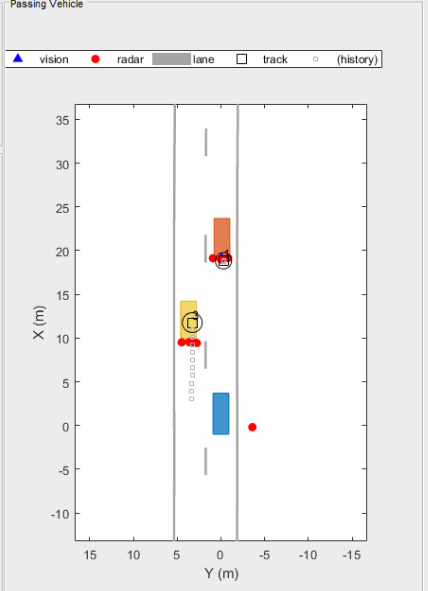

Above is an illustration of the clustering scenario. In the image the blue car is an ego vehicle (vehicle with sensor) and the detections are generated from the orange and yellow vehicles. Using clustering algorithm all the detections associated with the single target are merged into one point. This helps in the detection and assigning the tracks to a target.

#### Matlab Implementation of Clustering
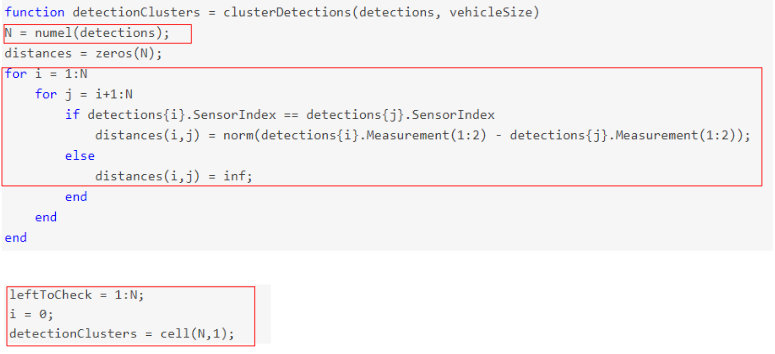

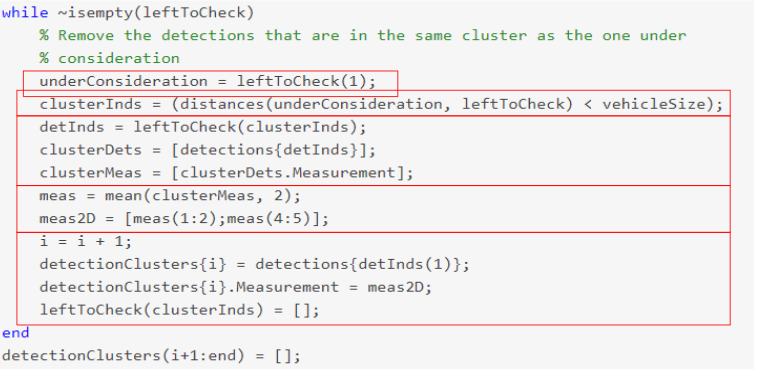

The clustering implementation above uses the following steps:

1. If the detections are from same sensor, then loop through every single detection point and measure the euclidean distance between all of them.
2. Keep running the loop until the detection list is empty

Implement the following within the while loop:

3. Pick the first detection in the check list and check for its clustering neighbors.
4. If the distance between the first pick and remaining detections is less than the vehicle size, then group those detections and their respective radar sensor measurements, including range and velocity.
5. For the group, take the **mean of the range and velocity** measurements.

**Note**: the radar measurement vector has 6 values - where range and velocity for x and y coordinates reside at indices 1,2, 4, and 5: [x, y, - , Vx, Vy, -]

6. Create a new Cluster ID. Then, assign all the group detections to the same ID.
7. Further, assign cluster, the mean range and velocity.
8. In the end, delete from the list the detections which have already been assigned to a cluster.
9. Keep repeating the process until the detection list is empty.



### b) Kalman Tracking
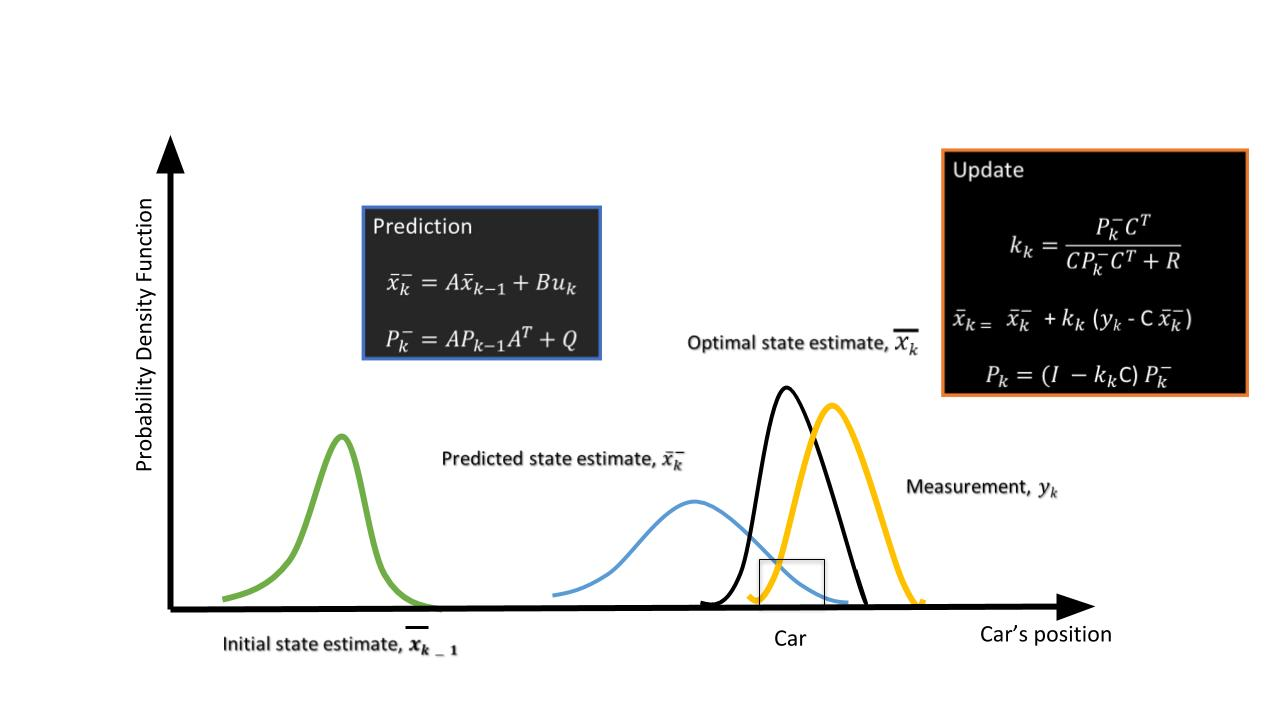

* x^_k, the state of the vehicle at the kkth step.
* A, the state-transition model
* P_k, the state covariance matrix - state estimation covariance error
* B, control matrix - external influence
* C, the observation/measurement model
* Q, the covariance of the process noise
* R, the covariance of the observation noise

The purpose of the Kalman filter is to estimate the state of a tracked vehicle. Here, "state" could include the position, velocity, acceleration or other properties of the vehicle being tracked. The Kalman filter uses measurements that are observed over time that contain noise or random variations and other inaccuracies, and produces values that tend to be closer to the true values of the measurements and their associated calculated values. It is the central algorithm to the majority of all modern radar tracking systems.

Here, we will be keeping the Kalman Filter limited to a basic introduction. You will be covering Kalman filters in detail in the fourth course of this Nanodegree program.

The Kalman filter process has two steps: prediction and update.

##### 1. Prediction Step

Using the target vehicle's motion model, the next state of the target vehicle is predicted by using the current state. Since we know the current position and velocity of the target from the previous timestamp, we can predict the position of the target for next timestamp.

For example, using a constant velocity model, the new position of the target vehicle can be computed as:

**x_{new} = x_{prev} + v * t**

##### 2. Update Step :

Here, the Kalman filter uses noisy measurement data from sensors, and combines the data with the prediction from the previous step to produce a best-possible estimate of the state.

#### Kalman Tracking and MATLAB
The trackingKF class creates a discrete-time linear Kalman filter used for tracking positions and velocities of objects which can be encountered in an automated driving scenario, such as automobiles, pedestrians, bicycles, and stationary structures or obstacles.

You can learn more about different parameters for the filter [here](https://www.mathworks.com/help/driving/ref/trackingkf-class.html), and you can learn more about the theory behind Kalman filters [here](https://www.mathworks.com/help/driving/ug/linear-kalman-filters.html).

#### Implementation in MATLAB
The following guidelines can be used to implement a basic Kalman filter for the next project.

* You will define the Kalman filter using the `trackingKF` function. The function signature is as follows:
```c
 filter = trackingKF('MotionModel', model, 'State', state, 'MeasurementModel', measurementModel, 'StateCovariance', stateCovrariance, 'MeasurementNoise', measurementNoise)
     
```

In this function signature, each property (e.g. `MotionModel`) is followed by the value for that property (e.g. `model`).

* For the `model` variable, you can pass the string '2D Constant Velocity', which will provides the `2D constant velocity` motion model.

* For the 2D constant velocity model the state vector (x) can be defined as:

```c
[x;vx;y;vy]
```

Here, `x` and `y` are 2D position coordinates. The variables `vx` and `vy` provide the velocity in 2D.

* A `RadarDetectionGenerator` function is used to generate detection points based on the returns after reflection. Every Radar detection generates a **detection measurement** and **measurement noise** matrix: `detection.Measurement` and `detection.MeasurementNoise`.The **detection measurement vector (z)** has the format `[x;y;vx;vy]`.

##### Measurement Models

Measurements are what you observe about your system. Measurements depend on the state vector but are not always the same as the state vector.The measurement model assumes that the actual measurement at any time is related to the current state by

```c
z  = H*x
```

As a result, for the case above the measurement model is `H = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]`

Using this measurement model, the state can derived from the measurements.

```c
x = H'*z
state = H'*detection.Measurement
```

Further, using the generated measurement noise and measurement model define the state covariance matrix:

```c
stateCovariance =H'*detection.MeasurementNoise*H
```

#### Further Research
For further explanation of Kalman Filters with MATLAB, you can refer to [this video series](https://www.youtube.com/watch?v=mwn8xhgNpFY&list=PLn8PRpmsu08pzi6EMiYnR-076Mh-q3tWr).


### c) MATLAB Sensor Fusion Guided Walkthrough

The following steps will take you on a guided walkthrough of performing Kalman Filtering in a simulated environment using MATLAB. You can download the starter code file `Sensor_Fusion_with_Radar.m` for this walkthrough in the Resources section for this lesson.

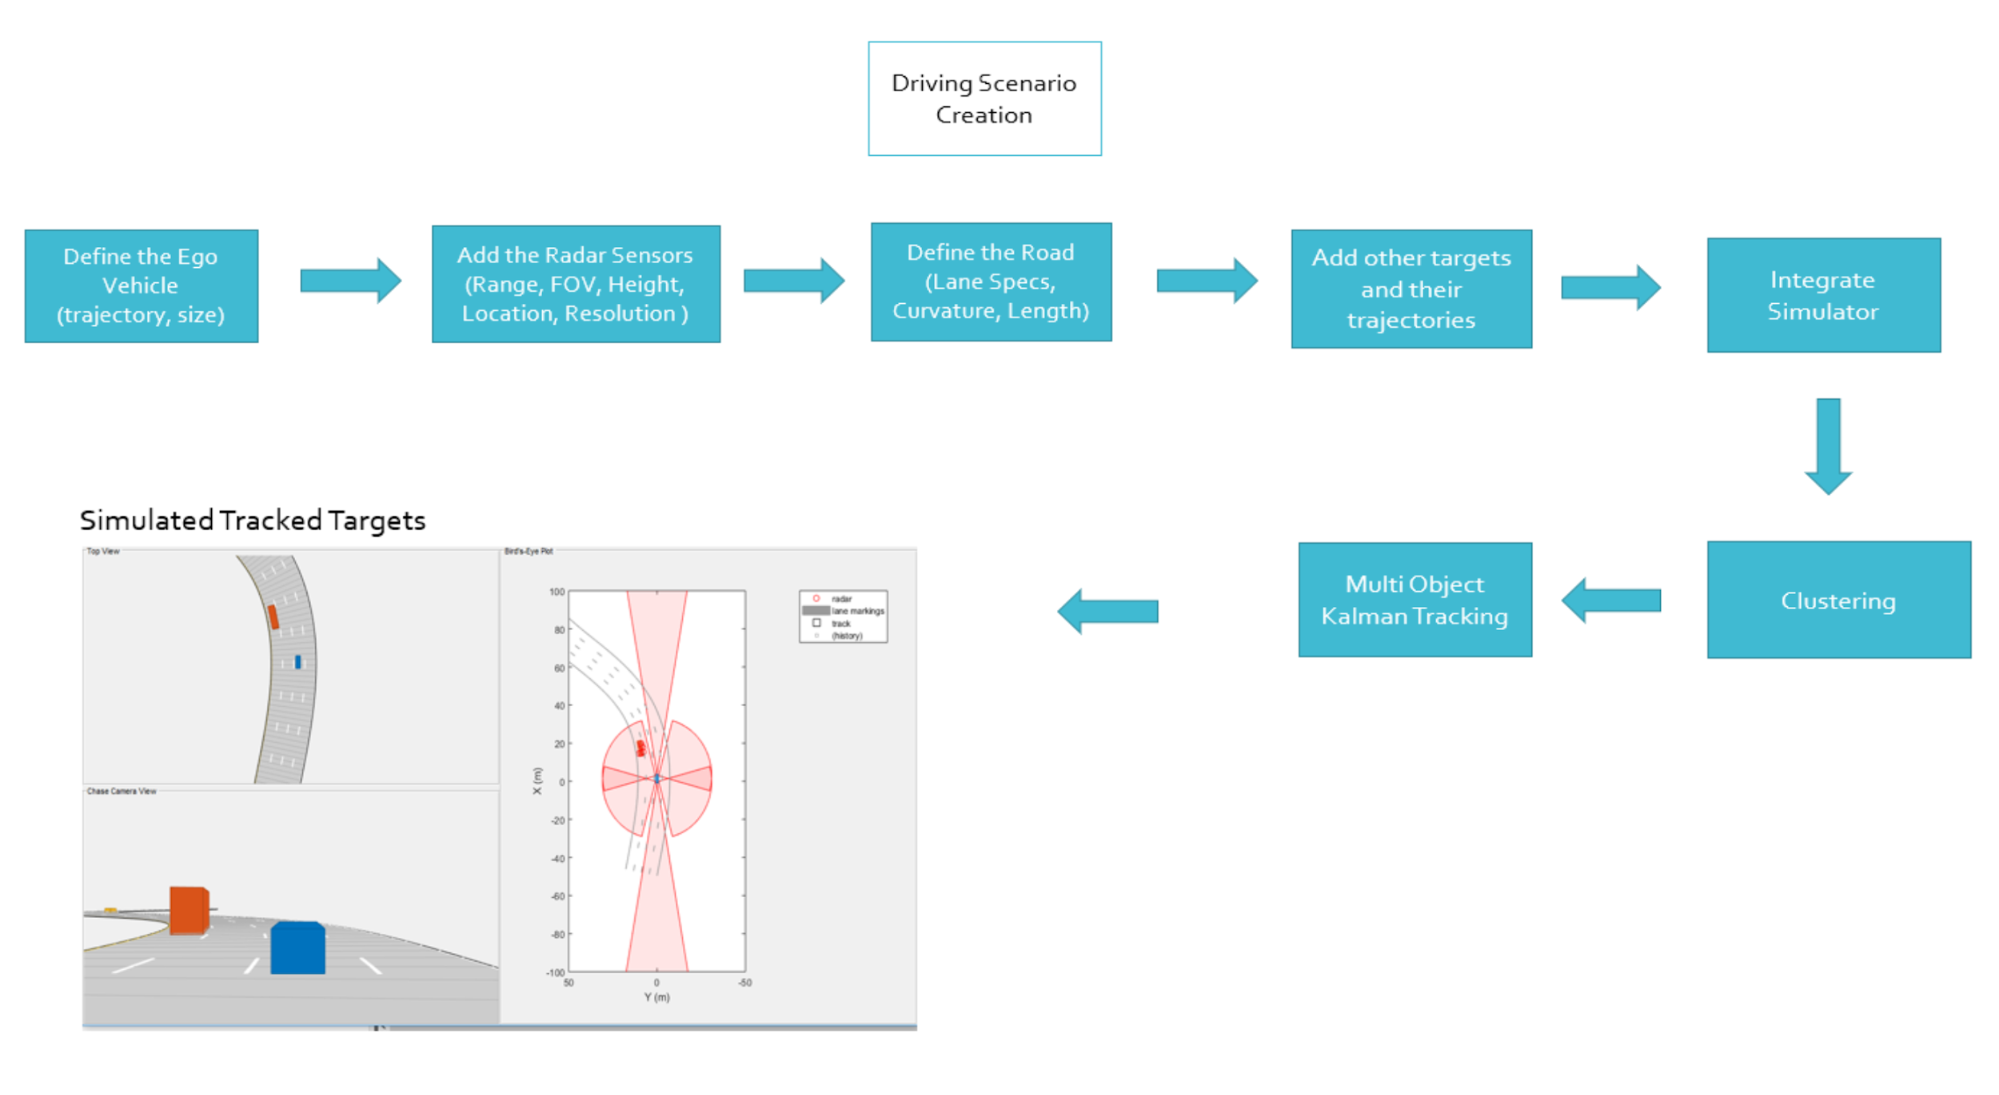
Radar Sensor Fusion Mini-Project

Sensor fusion and control algorithms for automated driving systems require rigorous testing. Vehicle-based testing is not only time consuming to set up, but also difficult to reproduce. Automated Driving System Toolbox provides functionality to define road networks, actors, vehicles, and traffic scenarios, as well as statistical models for simulating synthetic radar and camera sensor detection. This example shows how to generate a scenario, simulate sensor detections, and use sensor fusion to track simulated vehicles. The main benefit of using scenario generation and sensor simulation over sensor recording is the ability to create rare and potentially dangerous events and test the vehicle algorithms with them. This example covers the entire synthetic data workflow.

#### Generate the Scenario
Scenario generation comprises generating a road network, defining vehicles that move on the roads, and moving the vehicles.In this example, you test the ability of the sensor fusion to track a vehicle that is passing on the left of the ego vehicle. The scenario simulates a highway setting, and additional vehicles are in front of and behind the ego vehicle. Find more on how to generate these scenarios here : [Automated Driving Toolbox](https://www.mathworks.com/videos/driving-scenario-designer-1529302116471.html)

```c
% Define an empty scenario

scenario = drivingScenario;
scenario.SampleTime = 0.01;

% Add a stretch of 500 meters of typical highway road with two lanes. 
% The road is defined using a set of points, where each point defines the center of the 
% road in 3-D space, and a road width.

roadCenters = [0 0; 50 0; 100 0; 250 20; 500 40];
roadWidth = 7.2; % Two lanes, each 3.6 meters
road(scenario, roadCenters, roadWidth);

% Create the ego vehicle and three cars around it: one that overtakes the ego vehicle 
% and passes it on the left, one that drives right in front of the ego vehicle and 
% one that drives right behind the ego vehicle. 
% All the cars follow the path defined by the road waypoints by using the path driving 
% policy. The passing car will start on the right lane, move to the left lane to pass, 
% and return to the right lane.

% Create the ego vehicle that travels at 25 m/s along the road.
egoCar = vehicle(scenario, 'ClassID', 1);
path(egoCar, roadCenters(2:end,:) - [0 1.8], 25); % On right lane


% Add a car in front of the ego vehicle.
leadCar = vehicle(scenario, 'ClassID', 1);
path(leadCar, [70 0; roadCenters(3:end,:)] - [0 1.8], 25); % On right lane

% Add a car that travels at 35 m/s along the road and passes the ego vehicle.
passingCar = vehicle(scenario, 'ClassID', 1);
waypoints = [0 -1.8; 50 1.8; 100 1.8; 250 21.8; 400 32.2; 500 38.2];
path(passingCar, waypoints, 35);

% Add a car behind the ego vehicle
chaseCar = vehicle(scenario, 'ClassID', 1);
path(chaseCar, [25 0; roadCenters(2:end,:)] - [0 1.8], 25); % On right lane

```

#### Define Radar
In this example, you simulate an ego vehicle that has 6 radar sensors covering the 360 degrees field of view. The sensors have some overlap and some coverage gap. The ego vehicle is equipped with a long-range radar sensor on both the front and the back of the vehicle. Each side of the vehicle has two short-range radar sensors, each covering 90 degrees. One sensor on each side covers from the middle of the vehicle to the back. The other sensor on each side covers from the middle of the vehicle forward. The figure in the next section shows the coverage.

```c
sensors = cell(6,1);

% Front-facing long-range radar sensor at the center of the front bumper of the car.
sensors{1} = radarDetectionGenerator('SensorIndex', 1, 'Height', 0.2, 'MaxRange', 174, ...
 'SensorLocation', [egoCar.Wheelbase + egoCar.FrontOverhang, 0], 'FieldOfView', [20, 5]);

```

The rest of the radar sensors are defined in the project code.

#### Create a multiObjectTracker
Create a `multiObjectTracker` to track the vehicles that are close to the ego vehicle. The tracker uses the `initSimDemoFilter` supporting function to initialize a constant velocity linear Kalman filter that works with position and velocity. Tracking is done in 2-D. Although the sensors return measurements in 3-D, the motion itself is confined to the horizontal plane, so there is no need to track the height.

```c
tracker = multiObjectTracker('FilterInitializationFcn', @initSimDemoFilter, ...
 'AssignmentThreshold', 30, 'ConfirmationParameters', [4 5]);

positionSelector = [1 0 0 0; 0 0 1 0]; % Position selector
velocitySelector = [0 1 0 0; 0 0 0 1]; % Velocity selector

```

MultiObjectTracker Function has several parameters that can be tuned for different driving scenarios. It controls the track creation and deletion One can learn more about these [here](https://www.mathworks.com/help/driving/ref/multiobjecttracker-system-object.html).

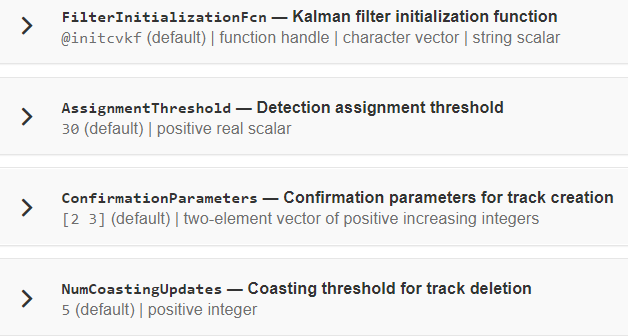

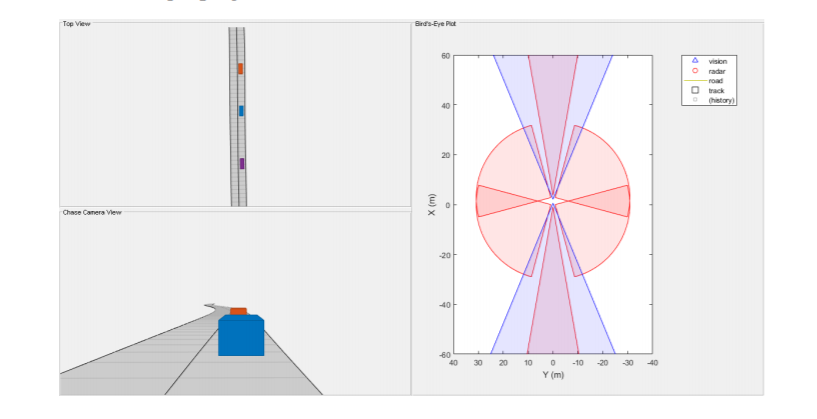

#### Simulate the Scenario
The following loop moves the vehicles, calls the sensor simulation, and performs the tracking. Note that the scenario generation and sensor simulation can have different time steps. Specifying different time steps for the scenario and the sensors enables you to decouple the scenario simulation from the sensor simulation. This is useful for modeling actor motion with high accuracy independently from the sensor’s measurement rate.

Another example is when the sensors have different update rates. Suppose one sensor provides updates every 20 milliseconds and another sensor provides updates every 50 milliseconds. You can specify the scenario with an update rate of 10 milliseconds and the sensors will provide their updates at the correct time. In this example, the scenario generation has a time step of 0.01 second, while the sensors detect every 0.1 second.

The sensors return a logical flag, `isValidTime`, that is true if the sensors generated detections. This flag is used to call the tracker only when there are detections. Another important note is that the sensors can simulate multiple detections per target, in particular when the targets are very close to the radar sensors. Because the tracker assumes a single detection per target from each sensor, you must cluster the detections before the tracker processes them. This is done by implementing clustering algorithm, the way we discussed above.

```c
toSnap = true;
while advance(scenario) && ishghandle(BEP.Parent)    
    % Get the scenario time
    time = scenario.SimulationTime;

    % Get the position of the other vehicle in ego vehicle coordinates
    ta = targetPoses(egoCar);

    % Simulate the sensors
    detections = {};
    isValidTime = false(1,6);
    for i = 1:6
        [sensorDets,numValidDets,isValidTime(i)] = sensors{i}(ta, time);
        if numValidDets
            detections = [detections; sensorDets]; %#ok<AGROW>
        end
    end

    % Update the tracker if there are new detections
    if any(isValidTime)
        vehicleLength = sensors{1}.ActorProfiles.Length;
        detectionClusters = clusterDetections(detections, vehicleLength);
        confirmedTracks = updateTracks(tracker, detectionClusters, time);

        % Update bird's-eye plot
        updateBEP(BEP, egoCar, detections, confirmedTracks, positionSelector, velocitySelector);
    end

    % Snap a figure for the document when the car passes the ego vehicle
    if ta(1).Position(1) > 0 && toSnap
        toSnap = false;
        snapnow
    end
end

```

#### Define the Kalman Filter
Define the Kalman Filter here to be used with `multiObjectTracker`.

In MATLAB a `trackingKF` function can be used to initiate Kalman Filter for any type of Motion Models. This includes the 1D, 2D or 3D constant velocity or even constant acceleration. You can read more about this [here](https://www.mathworks.com/help/driving/ref/trackingkf-class.html).

`initSimDemoFilter` This function initializes a constant velocity filter based on a detection.

```c
function filter = initSimDemoFilter(detection)

% Use a 2-D constant velocity model to initialize a trackingKF filter.
% The state vector is [x;vx;y;vy]
% The detection measurement vector is [x;y;vx;vy]
% As a result, the measurement model is H = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]

H = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1];
filter = trackingKF('MotionModel', '2D Constant Velocity', ...
 'State', H' * detection.Measurement, ...
 'MeasurementModel', H, ...
 'StateCovariance', H’ * detection.MeasurementNoise * H, ...
 'MeasurementNoise', detection.MeasurementNoise);
end

```

#### Cluster Detections
This function merges multiple detections suspected to be of the same vehicle to a single detection. The function looks for detections that are closer than the size of a vehicle. Detections that fit this criterion are considered a cluster and are merged to a single detection at the centroid of the cluster. The measurement noises are modified to represent the possibility that each detection can be anywhere on the vehicle. Therefore, the noise should have the same size as the vehicle size. In addition, this function removes the third dimension of the measurement (the height) and reduces the measurement vector to `[x;y;vx;vy]`.

We already went through its implementation in the clustering concept of this lesson.

#### Run Your Code
Now, It’s time to run the code and see the output!

It is highly recommended to spend some time on this sensor fusion code. It’s a good place to start learning and implementing sensor fusion techniques.

